In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from scipy.io import loadmat, savemat

from tensorflow.keras import layers

from sklearn.model_selection import KFold
from sklearn.metrics import label_ranking_average_precision_score as avgprec, coverage_error, label_ranking_loss

In [2]:
d3106 = loadmat('data/Y_3106.mat')

In [3]:
d3106.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y_3106'])

In [4]:
l3106 = d3106['Y_3106']

In [5]:
l3106.shape

(3106, 14)

In [6]:
counter3 = np.sum(l3106, axis = 1)

In [7]:
counter3.shape

(3106,)

In [8]:
import matplotlib.pyplot as plt

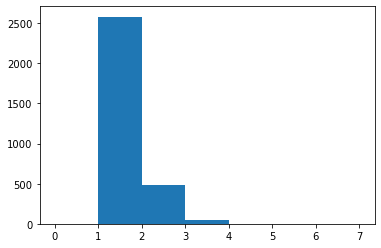

In [41]:
plt.figure()
r = np.random.randn(100)
r1 = r + 1
labels = ['Rabbits', 'Frogs']
H3 = plt.hist(counter, bins = np.arange(8))
plt.show()

In [35]:
H

(array([   0., 2580.,  480.,   43.,    3.,    0.,    0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

In [13]:
d4802 = loadmat('data/Y_4802.mat')
l4802 = d4802['Y_4802']
l4802[:, 18] = 0
l4802[:, 23] = 0
l4802[:, 28] = 0
l4802[:, 31] = 0

In [14]:
l4802.shape

(4802, 37)

In [15]:
counter4 = np.sum(l4802, axis = 1)

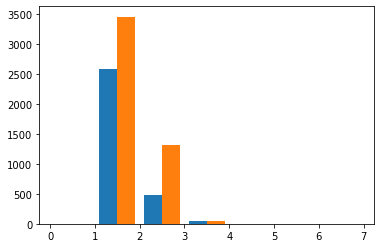

In [35]:
plt.figure()
r = np.random.randn(100)
r1 = r + 1
labels = ['Rabbits', 'Frogs']
H = plt.hist([counter3, counter4], bins = np.arange(8))
plt.show()

In [36]:
H

(array([[0.000e+00, 2.580e+03, 4.800e+02, 4.300e+01, 3.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 3.452e+03, 1.307e+03, 4.000e+01, 3.000e+00, 0.000e+00,
         0.000e+00]]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 2 BarContainer objects>)

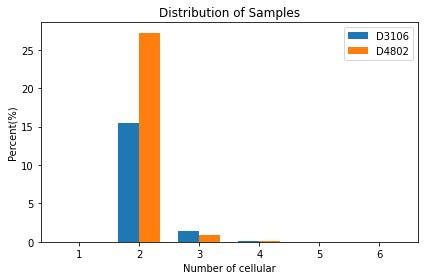

In [27]:
labels = [1,2,3,4,5,6]
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

d3 = H[0][0]/sum(H[0][0])*100
d4 = H[0][1]/sum(H[0][1])*100
d3[1] = 0
d4[1] = 0

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2,  d3[1:7], width, label='D3106')
rec2 = ax.bar(x + width/2,  d4[1:7], width, label='D4802')

ax.set_ylabel('Percent(%)')
ax.set_xlabel('Number of cellular')
ax.set_title('Distribution of Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rec1, padding=3)
# ax.bar_label(rec2, padding=3)

fig.tight_layout()

plt.show()

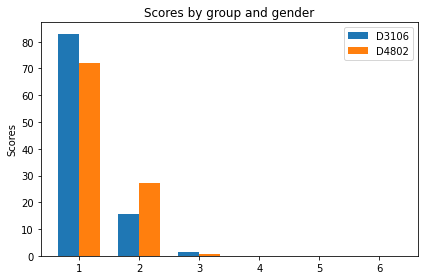

In [24]:
labels = [1,2,3,4,5,6]
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

dw3 = H[0][0]/sum(H[0][0])*100
dw4 = H[0][1]/sum(H[0][1])*100
# d3[1] = 0
# d4[1] = 0

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2,  dw3[1:7], width, label='D3106')
rec2 = ax.bar(x + width/2,  dw4[1:7], width, label='D4802')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rec1, padding=3)
# ax.bar_label(rec2, padding=3)

fig.tight_layout()

plt.show()

<Figure size 900x1080 with 0 Axes>

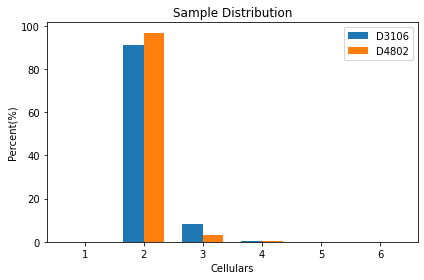

In [54]:
labels = [1,2,3,4,5,6]
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

d3 = H[0][0]/sum(H[0][0][2:])*100
d4 = H[0][1]/sum(H[0][1][2:])*100
d3[1] = 0
d4[1] = 0

from matplotlib.pyplot import figure

figure(figsize = (10,12), dpi=90)

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2,  d3[1:7], width, label='D3106')
rec2 = ax.bar(x + width/2,  d4[1:7], width, label='D4802')

ax.set_ylabel('Percent(%)')
ax.set_xlabel('Cellulars')
ax.set_title('Sample Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rec1, padding=3)
# ax.bar_label(rec2, padding=3)

fig.tight_layout()

plt.savefig('distribution.png')

plt.show()

<Figure size 900x1440 with 0 Axes>

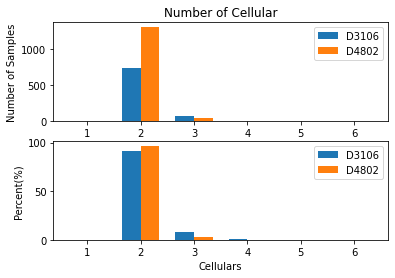

In [92]:
labels = [1,2,3,4,5,6]
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

# d3 = H[0][0]/sum(H[0][0])*100
# d4 = H[0][1]/sum(H[0][1])*100
# d3[1] = 0
# d4[1] = 0

n3 = H[0][0].copy()
n4 = H[0][1].copy()
n3[1] = 0
n4[1] = 0
figure(figsize = (10,16), dpi=90)

fig, ax = plt.subplots(2,1)
rec1 = ax[0].bar(x - width/2,  n3[1:7]*1.546, width, label='D3106')
rec2 = ax[0].bar(x + width/2,  n4[1:7], width, label='D4802')

ax[0].set_ylabel('Number of Samples')
ax[0].set_xlabel('Cellulars')
ax[0].set_title('Number of Cellular')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# ax.bar_label(rec1, padding=3)
# ax.bar_label(rec2, padding=3)

d3 = H[0][0]/sum(H[0][0][2:])*100
d4 = H[0][1]/sum(H[0][1][2:])*100
d3[1] = 0
d4[1] = 0

rec1 = ax[1].bar(x - width/2,  d3[1:7], width, label='D3106')
rec2 = ax[1].bar(x + width/2,  d4[1:7], width, label='D4802')

ax[1].set_ylabel('Percent(%)')
ax[1].set_xlabel('Cellulars')
# ax.set_title('Sample Distribution')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()


# fig.tight_layout()

plt.savefig('number.png')

plt.show()

In [93]:
d3

array([ 0.        ,  0.        , 91.25475285,  8.17490494,  0.57034221,
        0.        ,  0.        ])

In [94]:
d4

array([ 0.        ,  0.        , 96.81481481,  2.96296296,  0.22222222,
        0.        ,  0.        ])

In [68]:
n3

array([  0.,   0., 480.,  43.,   3.,   0.,   0.])

In [69]:
n4

array([   0.,    0., 1307.,   40.,    3.,    0.,    0.])

In [ ]:
labels = [1,2,3,4,5,6]
x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

# d3 = H[0][0]/sum(H[0][0])*100
# d4 = H[0][1]/sum(H[0][1])*100
# d3[1] = 0
# d4[1] = 0

n3 = H[0][0].copy()
n4 = H[0][1].copy()
# n3[1] = 0
# n4[1] = 0
figure(figsize = (10,16), dpi=90)

fig, ax = plt.subplots(2,1)
rec1 = ax[0].bar(x - width/2,  n3[1:7], width, label='D3106')
rec2 = ax[0].bar(x + width/2,  n4[1:7], width, label='D4802')

ax[0].set_ylabel('Number of Samples')
ax[0].set_xlabel('Cellulars')
ax[0].set_title('Number of Cellular')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# ax.bar_label(rec1, padding=3)
# ax.bar_label(rec2, padding=3)

rec1 = ax[1].bar(x - width/2,  d3[1:7], width, label='D3106')
rec2 = ax[1].bar(x + width/2,  d4[1:7], width, label='D4802')

ax[1].set_ylabel('Percent(%)')
ax[1].set_xlabel('Cellulars')
# ax.set_title('Sample Distribution')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()


# fig.tight_layout()

plt.savefig('number1.png')

plt.show()

In [32]:
d3

array([ 0.        ,  0.        , 91.25475285,  8.17490494,  0.57034221,
        0.        ,  0.        ])

In [33]:
d4

array([ 0.        ,  0.        , 96.81481481,  2.96296296,  0.22222222,
        0.        ,  0.        ])

In [22]:
dw3

array([ 0.        , 83.06503542, 15.45396008,  1.38441726,  0.09658725,
        0.        ,  0.        ])

In [23]:
dw4

array([0.00000000e+00, 7.18867139e+01, 2.72178259e+01, 8.32986256e-01,
       6.24739692e-02, 0.00000000e+00, 0.00000000e+00])

In [121]:
H[0][0]

array([  0.,   0., 480.,  43.,   3.,   0.,   0.])

In [111]:
c3 = H[0][0]
c4 = H[0][1]

In [112]:
c3[1] = 0

In [113]:
c4[1] = 0

In [114]:
c3/sum(c3)

array([0.        , 0.        , 0.91254753, 0.08174905, 0.00570342,
       0.        , 0.        ])

In [115]:
c4/sum(c4)

array([0.        , 0.        , 0.96814815, 0.02962963, 0.00222222,
       0.        , 0.        ])

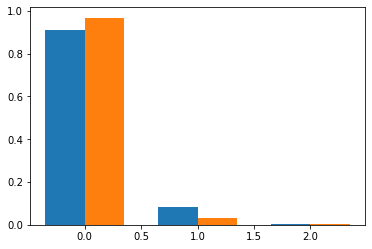

In [117]:
plt.figure()
plt.bar(x - width/2,  (c3/sum(c3))[2:5], width, label='3106')
plt.bar(x + width/2,  (c4/sum(c4))[2:5], width, label='4802')
plt.show()

In [76]:
c3

array([  0.,   0., 480.,  43.,   3.,   0.,   0.])

In [77]:
c4

array([   0.,    0., 1311.,   40.,    3.,    0.,    0.])

In [79]:
d4802 = loadmat('data/dataset_4802.mat')

In [80]:
d4802.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Header', 'Sequence', 'Y_4802', 'Y_4802_label'])

In [81]:
d4802['Y_4802_label']

array([[array(['Apical Plasma Membrane'], dtype='<U22')],
       [array(['Basolateral Plasma Membrane'], dtype='<U27')],
       [array(['Cellular Component Unknown'], dtype='<U26')],
       [array(['Centrosome'], dtype='<U10')],
       [array(['Cytoplasm'], dtype='<U9')],
       [array(['Cytoplasmic Vesicles'], dtype='<U20')],
       [array(['Cytoskeleton'], dtype='<U12')],
       [array(['ERGIC'], dtype='<U5')],
       [array(['Early Endosomes'], dtype='<U15')],
       [array(['Endoplasmic Reticulum'], dtype='<U21')],
       [array(['Endosomes'], dtype='<U9')],
       [array(['Extracellular'], dtype='<U13')],
       [array(['Golgi Apparatus'], dtype='<U15')],
       [array(['Golgi Cis Cisterna'], dtype='<U18')],
       [array(['Golgi Trans Cisterna'], dtype='<U20')],
       [array(['Golgi Trans Face'], dtype='<U16')],
       [array(['Inner Mitochondrial Membrane'], dtype='<U28')],
       [array(['Late Endosomes'], dtype='<U14')],
       [array(['Lipid Particles'], dtype='<U15')],
    

In [101]:
sum(l4802[:, 28])

0

In [98]:
l4802[:, 18] = 0

In [70]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from scipy.io import loadmat, savemat

from tensorflow.keras import layers

from sklearn.model_selection import KFold
from sklearn.metrics import label_ranking_average_precision_score as avgprec, coverage_error, label_ranking_loss

In [89]:
modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']
fname = ['/share/bmc.subcellular.results/encoding_3106/new_encoding_3106_res_', 
         '/share/bmc.subcellular.results/encoding_3106_lrg/new_encoding_3106_lrg_', 
         '/share/bmc.subcellular.results/pssm_conv_3106/new_pssm_3106_', 
         '/share/bmc.subcellular.results/encoding_pssm_3106/new_encoding_pssm_3106_']
ap_res3106 = []
rl_res3106 = []
cov_res3106 = []
for m in range(2):
    for n in range(2):
        ap_tres = []
        rl_tres = []
        cov_tres = []
        for c in range(5):
            filename = fname[m*2+n] +str(c) + '_' +  '9.mat'
            result = loadmat(filename)
            test_y = result['test_y']
            pred_y = result['pred_y']
#             ap_t = []
#             rl_t = []
#             cov_t = []
#             for i in range(20):
#                 r = np.random.choice(test_y.shape[0], 1000, replace=False)
#                 ap_t.append(avgprec(test_y[r, :], pred_y[r, :]))
#                 rl_t.append(label_ranking_loss(test_y[r, :], pred_y[r, :]))
#                 cov_t.append(coverage_error(test_y[r, :], pred_y[r, :]) - 1)
            ap_tres.append(avgprec(test_y, pred_y))
            rl_tres.append(label_ranking_loss(test_y, pred_y))
            cov_tres.append(coverage_error(test_y, pred_y) - 1)
        ap_res3106.append(ap_tres)
        rl_res3106.append(rl_tres)
        cov_res3106.append(cov_tres)
for tmp in [ap_res3106, rl_res3106, cov_res3106]:
    print('*********')
#     for i in range(4):
#         for j in range(4):
    t, p = stats.ttest_ind(tmp[3],tmp[1], axis = None)
    print(i, j, t, p)

*********
3 3 0.9330420615788154 0.37809853997838716
*********
3 3 -1.113251914231795 0.29792867467881184
*********
3 3 -0.9568940046270367 0.36664015710057324


In [79]:
ap_res3106

[[0.7475997072525776,
  0.7639816469476012,
  0.7503580108831848,
  0.7451590463555384,
  0.7546496472057452],
 [0.791022045629037,
  0.784409087690357,
  0.7853275007226361,
  0.7867113857460473,
  0.7905815668083608],
 [0.6324152999265534,
  0.6536278778772537,
  0.6452437670992848,
  0.6449189174480052,
  0.6376556878807895],
 [0.7902755483589939,
  0.7931758322636536,
  0.7967224341895313,
  0.7853370560116613,
  0.7848830002348471]]

In [72]:
from scipy import stats

In [85]:
t, p = stats.ttest_ind([0.07499, 0.07372, 0.07514, 0.07395, 0.07484], 
                       [0.07377, 0.07406, 0.07416, 0.07428, 0.07445], axis = None)

In [86]:
t, p

(1.2356276663966184, 0.2516485029056025)

In [81]:
for tmp in [ap_res3106, rl_res3106, cov_res3106]:
    print('*********')
    for i in range(4):
        for j in range(4):
            t, p = stats.ttest_ind(tmp[i],tmp[j], axis = None)
            print(i, j, t, p)

*********
0 0 0.0 1.0
0 1 -9.864106607527125 9.400235048692493e-06
0 2 22.347976883484485 1.7000577416143712e-08
0 3 -9.401851911706832 1.3426265769336033e-05
1 0 9.864106607527125 9.400235048692493e-06
1 1 0.0 1.0
1 2 37.47565217011921 2.820612097394455e-10
1 3 -0.9330420615788154 0.37809853997838716
2 0 -22.347976883484485 1.7000577416143712e-08
2 1 -37.47565217011921 2.820612097394455e-10
2 2 0.0 1.0
2 3 -34.46977173949656 5.485529675517782e-10
3 0 9.401851911706832 1.3426265769336033e-05
3 1 0.9330420615788154 0.37809853997838716
3 2 34.46977173949656 5.485529675517782e-10
3 3 0.0 1.0
*********
0 0 0.0 1.0
0 1 7.277821475772223 8.570806918007606e-05
0 2 -11.621065414291996 2.736722072974473e-06
0 3 7.260450338901004 8.716447000689536e-05
1 0 -7.277821475772223 8.570806918007606e-05
1 1 0.0 1.0
1 2 -27.42835839839206 3.3657373291845053e-09
1 3 1.113251914231795 0.29792867467881184
2 0 11.621065414291996 2.736722072974473e-06
2 1 27.42835839839206 3.3657373291845053e-09
2 2 0.0 1.0
2

In [82]:

modelname = ['BLSTM', 'BLSTM ConvNet1', 'ConvNet2', 'BLSTM ConvNet1 ConvNet2']

fname = ['/share/bmc.subcellular.results/4802_result/result_4802_', '/share/bmc.subcellular.results/4802_result/result_large-reg-4802_', 
         '/share/bmc.subcellular.results/4802_result/result_pssm-conv-4802_', '/share/bmc.subcellular.results/encoding_pssm_4802/new_encoding_pssm_4802_']
ap_res3106 = []
rl_res3106 = []
cov_res3106 = []
for m in range(2):
    for n in range(2):
        ap_tres = []
        rl_tres = []
        cov_tres = []
        for c in range(5):
            filename = fname[m*2+n] +str(c) + '_' +  '9.mat'
            result = loadmat(filename)
            test_y = result['test_y']
            pred_y = result['pred_y']
#             ap_t = []
#             rl_t = []
#             cov_t = []
#             for i in range(20):
#                 r = np.random.choice(test_y.shape[0], 1000, replace=False)
#                 ap_t.append(avgprec(test_y[r, :], pred_y[r, :]))
#                 rl_t.append(label_ranking_loss(test_y[r, :], pred_y[r, :]))
#                 cov_t.append(coverage_error(test_y[r, :], pred_y[r, :]) - 1)
            ap_tres.append(avgprec(test_y, pred_y))
            rl_tres.append(label_ranking_loss(test_y, pred_y))
            cov_tres.append(coverage_error(test_y, pred_y) - 1)
        ap_res3106.append(ap_tres)
        rl_res3106.append(rl_tres)
        cov_res3106.append(cov_tres)

In [83]:
for tmp in [ap_res3106, rl_res3106, cov_res3106]:
    print('*********')
    for i in range(4):
        for j in range(4):
            t, p = stats.ttest_ind(tmp[i],tmp[j], axis = None)
            print(i, j, t, p)

*********
0 0 0.0 1.0
0 1 -13.317378518721606 9.657451365431795e-07
0 2 16.352099881589734 1.970279295263045e-07
0 3 -12.005647490712203 2.1361931953778825e-06
1 0 13.317378518721606 9.657451365431795e-07
1 1 0.0 1.0
1 2 59.02737025931173 7.537108882880488e-12
1 3 4.198738675992731 0.00300168271194327
2 0 -16.352099881589734 1.970279295263045e-07
2 1 -59.02737025931173 7.537108882880488e-12
2 2 0.0 1.0
2 3 -78.30723653249377 7.88432312477748e-13
3 0 12.005647490712203 2.1361931953778825e-06
3 1 -4.198738675992731 0.00300168271194327
3 2 78.30723653249377 7.88432312477748e-13
3 3 0.0 1.0
*********
0 0 0.0 1.0
0 1 7.341541530385962 8.05922154200041e-05
0 2 4.6525818221936195 0.0016391694847435905
0 3 6.077706183808052 0.00029667928387106516
1 0 -7.341541530385962 8.05922154200041e-05
1 1 0.0 1.0
1 2 -7.025549774282536 0.00010980620570097193
1 3 -2.8190228455237425 0.022527756177637484
2 0 -4.6525818221936195 0.0016391694847435905
2 1 7.025549774282536 0.00010980620570097193
2 2 0.0 1.0
2